# Running a job on quantum hardware/simuator via *ibm_cloud*

In this section, the versions of essential packages are checked. If any of these packages are missing or have incompatible versions, you may encounter issues when running the code. Follow the instructions below to ensure a smooth execution of the notebook:

# Instructions:
**Check Versions:** Compare the installed versions with the specified versions in the code block above.<br>
**Installation/Update:** If necessary, install or update the packages using the appropriate package manager. For example, you can use the following command for installation:

!pip install qiskit==0.26.2 qiskit-aer==0.8.2 qiskit-aqua==0.9.1 qiskit-ibm-runtime==0.8.0 qiskit-ignis==0.6.0 qiskit-sphinx-theme==1.10.0 qiskit-terra==0.22.3

In [1]:
# Check if the following packages and the necessary depenencies are installed
'''
qiskit                    0.26.2                   pypi_0    pypi
qiskit-aer                0.8.2                    pypi_0    pypi
qiskit-aqua               0.9.1                    pypi_0    pypi
qiskit-ibm-runtime        0.8.0                    pypi_0    pypi
qiskit-ignis              0.6.0                    pypi_0    pypi
qiskit-sphinx-theme       1.10.0                   pypi_0    pypi
qiskit-terra              0.22.3                   pypi_0    pypi
'''

'\nqiskit                    0.26.2                   pypi_0    pypi\nqiskit-aer                0.8.2                    pypi_0    pypi\nqiskit-aqua               0.9.1                    pypi_0    pypi\nqiskit-ibm-runtime        0.8.0                    pypi_0    pypi\nqiskit-ignis              0.6.0                    pypi_0    pypi\nqiskit-sphinx-theme       1.10.0                   pypi_0    pypi\nqiskit-terra              0.22.3                   pypi_0    pypi\n'

In the code below, we import the **QiskitRuntimeService** module from the *qiskit_ibm_runtime* package. This module provides access to the Qiskit Runtime service, which allows you to execute Qiskit circuits on a remote IBM Quantum system with enhanced capabilities.

After importing the module, the code prints the message *loaded runtime* to indicate that the Qiskit Runtime Service has been successfully loaded and is ready for use in the subsequent code cells.

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
print("loaded runtime")

loaded runtime


In the code block below, the Qiskit Runtime Service's save_account method is used to save IBM Quantum account information to disk. This information includes the IBM Cloud API key, IBM Cloud CRN (Cloud Resource Name), and a custom account name.

**Make sure to replace the placeholder values ("IBM Cloud API key", "IBM Cloud CRN", "account-name") with your actual IBM Quantum account details.**

After saving the account information, the code prints the message "loaded account info" to indicate that the account information has been successfully loaded and saved to disk. This information is crucial for authenticating and accessing IBM Quantum services in the subsequent code cells.

In [6]:
### Save account to disk. 
'''
QiskitRuntimeService.save_account(channel="ibm_cloud", 
                token="<IBM Cloud API key>", 
                instance="<IBM Cloud CRN>", 
                name="<account-name>")
'''

print("loaded account info")

loaded account info


Below, the QiskitRuntimeService is instantiated with the provided IBM Quantum account information, such as the IBM Cloud API key and IBM Cloud CRN. This is done using the channel, token, and instance parameters.

Again, make sure to replace the placeholder values ("IBM Cloud API key", "IBM Cloud CRN", "account-name") with your actual IBM Quantum account details.

The subsequent print statements provide information about the instantiated QiskitRuntimeService object:

Service: Outputs the information about the Qiskit Runtime Service.<br>
Service - Channel: Outputs the channel associated with the service.<br>

After printing information about the service, the code queries and displays a list of available backends using the service.backends() method. This helps you identify the quantum devices and simulators that you can use for your computations.

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

## Load saved credentials
#service = QiskitRuntimeService(name="<account name>")

# Use this command if you didn't save your credentials:
service = QiskitRuntimeService(channel="ibm_cloud", token="<IBM Cloud API key>", instance="<IBM Cloud CRN>")


print("Service:", service)
print("Service - Channel:", service.channel)
print("")

print("Available backends:")
service.backends()

Here, the get_backend method of the QiskitRuntimeService object is used to load the necessary backend. The specified backend in this case is "ibmq_qasm_simulator".

The loaded backend is then assigned to the variable backend. The subsequent print statement outputs information about the loaded backend, providing details such as the backend name, configuration, and other relevant information.

This step is crucial for setting up the target backend where your quantum circuits will be executed. Depending on your needs, you can replace "ibmq_qasm_simulator" with the name of a different quantum device or simulator provided by IBM Quantum.

In [9]:
# Load necessary backend
backend = service.get_backend("ibmq_qasm_simulator")
print("backend:", backend)

# Defining a quantum circuit and an observable to measure

In the code below, a random quantum circuit is generated using the random_circuit function from qiskit.circuit.random. The circuit is created with 2 qubits and 2 classical bits, and it is decomposed using the decompose method with reps=1 to simplify its structure.

The visual representation of the generated random circuit is then displayed using the draw method with the "mpl" (Matplotlib) backend.

Next, an observable is defined using the SparsePauliOp class from qiskit.quantum_info. In this example, the observable is set to "XZ," indicating a Pauli operator that is a tensor product of X on the first qubit and Z on the second qubit.

Finally, the code prints information about the defined observable, specifically the Pauli operators that constitute it.

This code is useful for demonstrating the creation of a random quantum circuit and defining an observable for further quantum computations. Adjust the parameters and observables as needed for your specific use case.

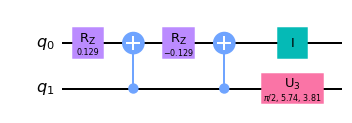

>>> Observable: ['XZ']


In [14]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp

### Create random circuit
circuit = random_circuit(2,2, seed=0).decompose(reps=1)
display(circuit.draw("mpl"))

observable = SparsePauliOp("XZ")
print(f">>> Observable: {observable.paulis}")

# Estimator

The **Qiskit Runtime Estimator** is initialized using the Estimator class from qiskit_ibm_runtime.

The print statements at the beginning provide information about the Qiskit Runtime Service and its channel.

A Session is initialized using the specified Qiskit Runtime service and backend.The Estimator is then initialized with the created session.The run method of the Estimator is used to execute the quantum circuit (circuit) and estimate the observable (observable) on the specified backend (backend).

Information about the executed job, such as the job ID and status, is printed to the console.

This code is part of the process for using the Qiskit Runtime service to estimate the expectation value of an observable for a given quantum circuit. Adjustments may be needed based on your specific requirements and the characteristics of your quantum computation.

In [15]:
### Initialize the Qiskit Runtime Estimator
from qiskit_ibm_runtime import Estimator, Session, Options
print("Service:", service)
print("Channel:", service.channel)

with Session(service=service, backend=backend) as session:
    estimator = Estimator(session=session)
    job = estimator.run(circuit, observable)
    print(f">>> Job ID: {job.job_id()}")
    print(f">>> Job Status: {job.status()}")

Service: <QiskitRuntimeService>
Channel: ibm_cloud
>>> Job ID: clbi5bo4hipiui8pqe4g
>>> Job Status: JobStatus.RUNNING


The results of the previously executed job can be obtained using the 'result' method. The result variable is assigned the result of the job.result() call, which retrieves the results of the executed quantum computation.

The first print statement provides detailed information about the job result, including data about measurements, counts, and other relevant information. The second print statement outputs the expectation value obtained from the job result. The expectation value is extracted from the values attribute of the result object. The third print statement displays metadata associated with the job result. Metadata can include additional information about the computation or execution.

The final print statement indicates that the job has been successfully completed.

In [16]:
### Invoke the Estimator and get results
result = job.result()
print(f">>> {result}")
print(f"  > Expectation value: {result.values[0]}")
print(f"  > Metadata: {result.metadata[0]}")

print("Job done!")

>>> EstimatorResult(values=array([0.86]), metadata=[{'variance': 0.2604000000000001, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])
  > Expectation value: 0.86
  > Metadata: {'variance': 0.2604000000000001, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}
Job done!


# Sampler

Here **Qiskit Runtime Sampler** is used to run a predefined reference circuit (Bell state) on the IBM Quantum simulator. 

The print statements at the beginning provide information about the Qiskit Runtime Service and its channel.
The Options class is used to define options for the Sampler, such as the optimization level (set to 3 in this example).

A Session is initialized using the specified backend ("ibmq_qasm_simulator"). The Sampler is then initialized with the created session and options.The run method of the Sampler is used to execute the Bell state reference circuit.
Information about the executed Sampler job, including the job ID and result, is printed to the console.

In [9]:
# Also do this with Sampler
from qiskit.test.reference_circuits import ReferenceCircuits
from qiskit_ibm_runtime import Sampler, Session, Options
print("Service:", service)
print("Channel:", service.channel)

options = Options(optimization_level=3)

with Session(backend="ibmq_qasm_simulator") as session:
    sampler = Sampler(session=session, options=options)
    job = sampler.run(ReferenceCircuits.bell())
    print(f"Sampler job ID: {job.job_id()}")
    print(f"Sampler job result: {job.result()}")

Sampler job ID: clb18j3k8l5ohotdi2l0
Sampler job result: SamplerResult(quasi_dists=[{0: 0.49875, 3: 0.50125}], metadata=[{'shots': 4000, 'circuit_metadata': {}, 'readout_mitigation_overhead': 1.0, 'readout_mitigation_time': 0.010131527989869937}])
